In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import warnings
import os
import cv2
import sys
import matplotlib.image as mpimg
from PIL import Image
import scipy
from scipy import ndimage
import io
import uvicorn
import numpy as np
import nest_asyncio
from enum import Enum
from fastapi import FastAPI, UploadFile, File, HTTPException
from fastapi.responses import StreamingResponse

import pickle
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from configs import *
warnings.filterwarnings('ignore')
%matplotlib inline


100
I have 351 image of me
I have 346 image of others
Now total number of images is 697
The shape of y is:  (1, 697)
===================Before===================
(600, 30000)
(97, 30000)
(1, 600)
(1, 97)
===================After===================
(30000, 600)
(30000, 97)
(1, 600)
(1, 97)


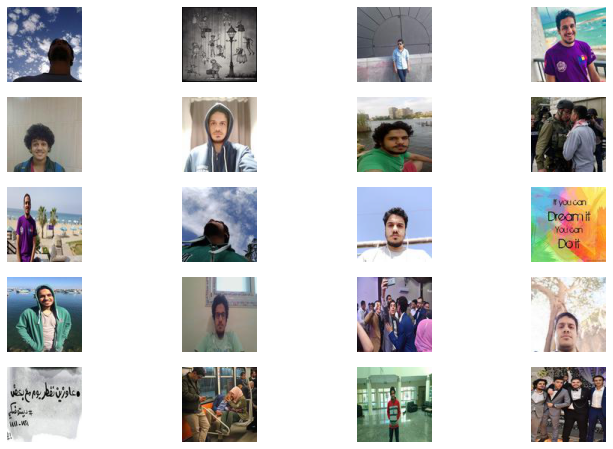

In [4]:
df_all_images = images_pipeline(100, "_100_100_3/")
X_train, X_val, y_train, y_val = load_train_validation_set(df_all_images)
display_some_images(X_train)

In [5]:
def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    return A

def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0.0
    return w, b

def propagate(w, b, X, Y):
    m, n = X.shape[1], X.shape[0] 
    Z = np.matmul(w.T, X) + b # Prediction
    A = sigmoid(Z)          # map prediction between 0 and 1
    cost = -(1/m) * (np.dot(Y, np.log(A).T) + np.dot((1-Y) , np.log(1-A).T))
    dZ = np.dot(X, (A-Y).T)
    dW = (1/m) * dZ
    dB = (1/m) * np.sum(dZ)
    grads = {"dW": dW,
             "dB": dB}
    return grads, cost

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dW = grads['dW']
        dB = grads['dB']
        w = w - learning_rate * dW
        b = b - learning_rate * dB
        if i % 100 == 0:
            costs.append(cost)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    params = {"w": w,
              "b": b}

    grads = {"dW": dW,
             "dB": dB}
    return params, grads, costs


def predict(w, b, X):
    m, n = X.shape[0], X.shape[1] 
    Z = np.matmul(w.T, X) + b # Prediction
    A = sigmoid(Z)          # map prediction between 0 and 1
    Y_prediction = 1. * (A > 0.5)
    return Y_prediction


def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    
    w,b  =initialize_with_zeros(X_train.shape[0])
    
    parameters, grads, costs = optimize(w, b, X_train, Y_train,
                                        num_iterations, learning_rate, print_cost=False)
    w = parameters["w"]
    b = parameters["b"]

    Y_prediction_test  = predict(w,b,X_val)
    Y_prediction_train = predict(w,b,X_train)
    

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

d = model(X_train, y_train, X_val, y_val, num_iterations = 1000, learning_rate = 0.5, print_cost = True)

train accuracy: 58.5 %
test accuracy: 54.63917525773196 %


[1]


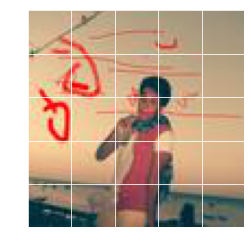

In [6]:
# Example of a picture that was wrongly classified.
index = 2
print(y_val[:,index])
plt.imshow(X_val[:,index].reshape((100, 100, 3)))

In [7]:

my_predicted_image = predict(d["w"], d["b"], X_val[:,index].reshape(-1, 1))

print(my_predicted_image)

[[1.]]


[1]


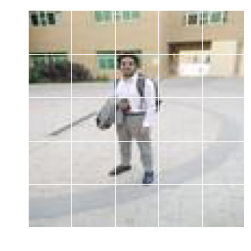

In [8]:
# Example of a picture that was wrongly classified.

index = 9
print(y_val[:,index])
plt.imshow(X_val[:,index].reshape((100, 100, 3)))


In [9]:

my_predicted_image = predict(d["w"], d["b"], X_val[:,index].reshape(-1, 1))

print(my_predicted_image)

[[1.]]
